In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("metals_daily_train.csv")
print("data shape: ", data.shape)
data.head()

data shape:  (2633, 558)


,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008,20080630
1,20080702,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008,20080630
2,20080703,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008,20080630
3,20080704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008,20080630
4,20080707,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009,20080707


In [36]:
filtered_data = data[data.p0.notnull()]
#filtered_data.shape
data = filtered_data.dropna()
print("data shape without NaN: ", data.shape)

data shape without NaN:  (2105, 558)


In [37]:
def float2date(x):
    x = float(x)
    date = str(x).split(".")[0]
    assert(len(date) == 8)
    
    year = int(date[0:4])
    month = int(date[4:6])
    day = int(date[6:8])
    return pd.datetime(year, month, day)

data["date"] = data["date"].map(float2date)


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
data

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
109,2008-12-01,444.511058,457.032497,457.032497,53.080,56.330,52.620,56.290,49.110,52.150,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030,20081201
110,2008-12-02,446.908899,465.530103,459.323035,55.990,56.290,54.680,55.300,51.800,52.240,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030,20081201
111,2008-12-03,453.484820,482.060575,459.696940,56.500,56.720,54.650,55.210,53.010,53.020,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030,20081201
112,2008-12-04,447.532919,472.395859,459.964389,55.500,57.810,54.880,57.620,51.750,54.420,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030,20081201
113,2008-12-05,447.084228,471.922241,459.503235,58.500,60.000,56.630,56.750,54.700,56.180,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030,20081201
114,2008-12-08,447.227191,472.073147,459.650169,55.030,55.850,54.140,54.670,51.820,53.770,...,8315.0,9010.0,8315.0,8900.0,8400.0,9060.0,8400.0,8970.0,2031,20081208
115,2008-12-09,447.285703,472.134908,459.710306,55.250,55.650,54.170,55.380,53.340,53.820,...,9270.0,9300.0,8955.0,9135.0,9270.0,9375.0,9010.0,9170.0,2031,20081208
116,2008-12-10,447.650117,472.519568,460.084842,55.160,55.600,53.780,54.440,53.360,53.710,...,9165.0,9400.0,9165.0,9295.0,9290.0,9460.0,9170.0,9355.0,2031,20081208
117,2008-12-11,448.237028,473.139085,460.688056,54.860,55.320,52.600,55.320,53.450,53.600,...,9350.0,9350.0,9140.0,9205.0,9395.0,9395.0,9190.0,9270.0,2031,20081208
118,2008-12-12,449.094065,467.806318,459.073933,55.850,56.500,54.220,54.460,53.920,54.500,...,9200.0,9215.0,8910.0,9090.0,9230.0,9230.0,8895.0,9070.0,2031,20081208


In [39]:
data = data.rename(index=str, columns={"metals_daily_train.csv": "date"})
data = data.set_index("date")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2008-12-01 to 2018-05-18
Columns: 557 entries, p0 to week_date
dtypes: float64(555), int64(2)
memory usage: 9.0 MB


,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,476.796242,498.505181,485.130214,20.336880,20.882794,19.821493,20.299921,21.123037,21.557553,20.708611,...,16971.063658,17113.615202,16824.423753,16969.374347,17003.477435,17150.084086,16852.432779,17000.531116,2278.507838,2.013254e+07
std,100.080426,97.873163,98.627432,7.647323,7.871755,7.412970,7.643242,7.176618,7.339560,7.019645,...,3660.005061,3705.174667,3602.801601,3652.320398,3634.488293,3678.404212,3575.960723,3625.653120,143.388561,2.758300e+04
min,227.076039,261.009561,248.225419,11.250000,11.350000,11.100000,11.175000,12.150000,12.250000,12.000000,...,8315.000000,9000.000000,8315.000000,8665.000000,8400.000000,8940.000000,8400.000000,8715.000000,2030.000000,2.008120e+07
25%,420.745698,444.634823,429.469980,15.290000,15.542000,14.950000,15.225000,16.250000,16.480000,16.000000,...,14795.000000,14860.000000,14717.000000,14785.000000,14820.000000,14882.000000,14737.000000,14814.000000,2154.000000,2.011042e+07
50%,488.135858,516.253262,497.672857,17.950000,18.550000,17.470000,17.975000,18.750000,19.250000,18.250000,...,15785.000000,15882.000000,15675.000000,15775.000000,15860.000000,15975.000000,15720.000000,15845.000000,2278.000000,2.013090e+07
75%,555.246577,570.278054,561.198936,23.000000,23.700000,22.410000,22.895000,24.150000,24.800000,23.680000,...,18175.000000,18325.000000,18005.000000,18182.000000,18317.000000,18510.000000,18150.000000,18325.000000,2403.000000,2.016012e+07
max,645.057249,669.933261,654.272352,58.500000,60.000000,56.630000,57.620000,54.700000,56.180000,53.450000,...,27065.000000,27235.000000,26700.000000,26915.000000,27000.000000,27750.000000,26650.000000,26865.000000,2523.000000,2.018051e+07


In [41]:
d = data
d

,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,444.511058,457.032497,457.032497,53.080,56.330,52.620,56.290,49.110,52.150,48.620,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030,20081201
2008-12-02,446.908899,465.530103,459.323035,55.990,56.290,54.680,55.300,51.800,52.240,51.040,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030,20081201
2008-12-03,453.484820,482.060575,459.696940,56.500,56.720,54.650,55.210,53.010,53.020,51.210,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030,20081201
2008-12-04,447.532919,472.395859,459.964389,55.500,57.810,54.880,57.620,51.750,54.420,51.600,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030,20081201
2008-12-05,447.084228,471.922241,459.503235,58.500,60.000,56.630,56.750,54.700,56.180,53.450,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030,20081201
2008-12-08,447.227191,472.073147,459.650169,55.030,55.850,54.140,54.670,51.820,53.770,50.000,...,8315.0,9010.0,8315.0,8900.0,8400.0,9060.0,8400.0,8970.0,2031,20081208
2008-12-09,447.285703,472.134908,459.710306,55.250,55.650,54.170,55.380,53.340,53.820,52.850,...,9270.0,9300.0,8955.0,9135.0,9270.0,9375.0,9010.0,9170.0,2031,20081208
2008-12-10,447.650117,472.519568,460.084842,55.160,55.600,53.780,54.440,53.360,53.710,52.590,...,9165.0,9400.0,9165.0,9295.0,9290.0,9460.0,9170.0,9355.0,2031,20081208
2008-12-11,448.237028,473.139085,460.688056,54.860,55.320,52.600,55.320,53.450,53.600,51.700,...,9350.0,9350.0,9140.0,9205.0,9395.0,9395.0,9190.0,9270.0,2031,20081208


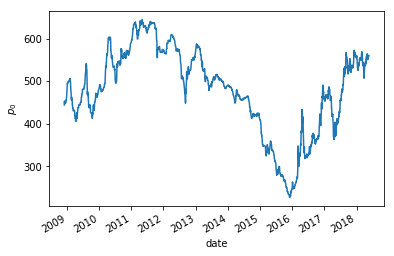

In [46]:
d["p0"].plot(x="index")
plt.ylabel("$p_0$")
plt.show()

In [47]:
# It does not really make sense to use features from the current time to predict p0 of the current time since it is
# obviously directly linked 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(d.drop(columns="p0"), d["p0"], test_size=0.1)

model = LinearRegression()
model.fit(x_train.values, y_train.values)
model.score(x_train, y_train)

0.9979776729173226

In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 3)
fit = rfe.fit(x_train.values, y_train.values)
print("score by using only the 3 most important features: ", fit.score(x_train, y_train))

score by using only the 3 most important features:  0.11783722560279342


In [49]:
rfe = RFE(model, 20)
fit = rfe.fit(x_train.values, y_train.values)
print("score by using only the 20 most important features: ", fit.score(x_train, y_train))

score by using only the 20 most important features:  0.8702173411928696


In [50]:
rfe = RFE(model, 40)
fit = rfe.fit(x_train.values, y_train.values)
print("score by using only the 40 most important features: ", fit.score(x_train, y_train))

score by using only the 20 most important features:  0.937375758091382


In [14]:
#SARA
